# ACME Sales Data Analysis 
This notebook crunches the quarterly sales data of our ABC division at ACME inc
## Collect sales data
Let's start by importing the Sales data from the data directory into a Pandas dataframe

In [12]:
import pandas as pd
# In the future I need to read from Isilon mount so it is better to mount on /root/ml-env/data
df = pd.read_csv('data/sales.csv')
df.head()

,Date,Product,UnitPrice,Quantity,Revenue,Profit,Rep
0,2023-02-01,Blue chair,20,8,160,132,Joe
1,2023-02-01,Square table,54,3,162,110,Peter
2,2023-02-01,Red chair,27,10,270,202,Jessica
3,2023-02-01,Short lamp,49,4,196,139,Jennifer
4,2023-02-08,Blue chair,20,9,180,153,Tom


We need to change the Date column type to "Datetime" 

In [34]:
df["Date"] = pd.to_datetime(df["Date"])
print(df.dtypes)

Date         datetime64[ns]
Product              object
UnitPrice             int64
Quantity              int64
Revenue               int64
Profit                int64
Rep                  object
dtype: object


## Amount of sales transactions
Let's see how many sales transactions we got

In [35]:
print("The data contains",len(df),"sales transactions")

The data contains 52 sales transactions


## Top sales rep
We find out what sales rep was the performer this quarter

In [38]:
revenue_by_rep = df[["Profit","Revenue","Rep"]].groupby("Rep").sum().sort_values(by=["Profit"],ascending=False)
revenue_by_rep.head()

,Profit,Revenue
Rep,,
Joe,3693,4886
Louis,1433,1784
Jessica,1176,1603
Jennifer,887,1225
Peter,734,1080


## Weekly revenue
Let's find out the weekly revenue

In [20]:
df["Date"] = pd.to_datetime(df["Date"])
#print(df.dtypes)
revenue_by_week = df[["Date","Profit","Revenue"]].groupby("Date").sum().sort_values(by=["Date"],ascending=True)
revenue_by_week

,Profit,Revenue
Date,,
2023-02-01,583,788
2023-02-08,889,1133
2023-02-15,625,878
2023-02-22,474,617
2023-03-01,697,932
2023-03-08,664,949
2023-03-15,725,949
2023-03-22,791,1070
2023-03-29,668,920


## Average weekly revenue

In [31]:
import numpy as np
#df["Revenue"]
revenue = revenue_by_week["Revenue"].tolist()
averageRevenue = np.average(revenue)
print("The average weekly revenue for this quarter was AUD", averageRevenue)

The average daily revenue for this quarter was AUD 892.5384615384615


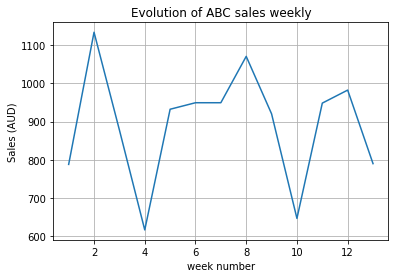

In [39]:
import matplotlib.pyplot as plt
weeks = np.arange(1,14,1)
fig, ax = plt.subplots()
ax.plot(weeks, revenue)

ax.set(xlabel='week number', ylabel='Sales (AUD)',
       title='Evolution of ABC sales weekly')
ax.grid()

fig.savefig("test.png")
plt.show()